## 1. Data Collection

In [55]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [56]:
stocks = ['TATAELXSI.NS', 'PERSISTENT.NS', 'ASTRAL.NS', 'DEEPAKNTR.NS', 'LTTS.NS']

market_index = '^NSEI'

In [57]:
end_date = datetime.today()
start_date = end_date - timedelta(days = 365 * 5)

In [58]:
stock_prices = yf.download(stocks, start=start_date, end=end_date, auto_adjust=True)['Close']

[*********************100%***********************]  5 of 5 completed


In [59]:
## Adjusted closing prices were used to accoubt for stock splits and dividends, ensuring accurate return calculations.

In [60]:
market_prices = yf.download(market_index, start=start_date, end=end_date, auto_adjust=True)['Close']

[*********************100%***********************]  1 of 1 completed


#### Data Collection Summary
- Collected 5 years of adjusted closing prices for selected Indian mid-cap stocks and NIFTY 50 (2021 - 2026)
- Adjusted prices account for corporate actions like splits and dividends.
- NIFTY 50 is used as the market benchmark for risk and CAPM analysis

In [61]:
prices = pd.concat([stock_prices, market_prices], axis=1)
prices.rename(columns={market_index: 'NIFTY50'}, inplace=True)

prices.dropna(inplace=True)
prices.head()

Ticker,ASTRAL.NS,DEEPAKNTR.NS,LTTS.NS,PERSISTENT.NS,TATAELXSI.NS,NIFTY50
Date,,,,,,
2021-01-20,945.209229,992.164917,2519.987305,784.077515,2660.490967,14644.700195
2021-01-21,946.212341,995.949585,2392.470947,766.989563,2460.155029,14590.349609
2021-01-22,925.675903,984.005859,2277.232422,741.117737,2448.940186,14371.900391
2021-01-25,923.140198,969.457153,2226.652100,738.717651,2365.808838,14238.900391
2021-01-27,923.976074,950.091553,2343.360596,726.645630,2537.416504,13967.500000


In [62]:
prices.tail()

Ticker,ASTRAL.NS,DEEPAKNTR.NS,LTTS.NS,PERSISTENT.NS,TATAELXSI.NS,NIFTY50
Date,,,,,,
2026-01-12,1438.699951,1574.300049,4316.299805,6325.5,5693.5,25790.250000
2026-01-13,1438.500000,1571.199951,4317.700195,6357.5,5793.0,25732.300781
2026-01-14,1462.599976,1564.000000,4243.799805,6274.0,5505.0,25665.599609
2026-01-16,1464.300049,1546.400024,3917.100098,6403.0,5605.5,25694.349609
2026-01-19,1439.000000,1535.599976,3870.000000,6438.0,5563.0,25585.500000


In [63]:
import os

os.makedirs("../data", exist_ok=True)

In [64]:
prices.to_csv("../data/raw_prices.csv")

In [65]:
prices.info()
prices.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2021-01-20 to 2026-01-19
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ASTRAL.NS      1235 non-null   float64
 1   DEEPAKNTR.NS   1235 non-null   float64
 2   LTTS.NS        1235 non-null   float64
 3   PERSISTENT.NS  1235 non-null   float64
 4   TATAELXSI.NS   1235 non-null   float64
 5   NIFTY50        1235 non-null   float64
dtypes: float64(6)
memory usage: 67.5 KB


Ticker,ASTRAL.NS,DEEPAKNTR.NS,LTTS.NS,PERSISTENT.NS,TATAELXSI.NS,NIFTY50
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,1610.766198,2089.397937,4154.915362,3280.460959,6355.964577,20166.476492
std,277.796577,363.561066,834.792344,1738.233469,1490.689614,3585.734604
min,923.140198,950.091553,2226.652100,719.637817,2365.808838,13634.599609
25%,1416.333618,1839.187073,3528.918579,1868.068787,5616.705566,17322.899414
50%,1536.706787,2056.706787,4265.399902,2449.673828,6512.775879,19310.150391
75%,1846.060608,2286.174683,4788.375000,5153.405762,7360.114990,23783.424805
max,2406.231201,3089.813232,5715.912598,6634.274414,10381.993164,26328.550781


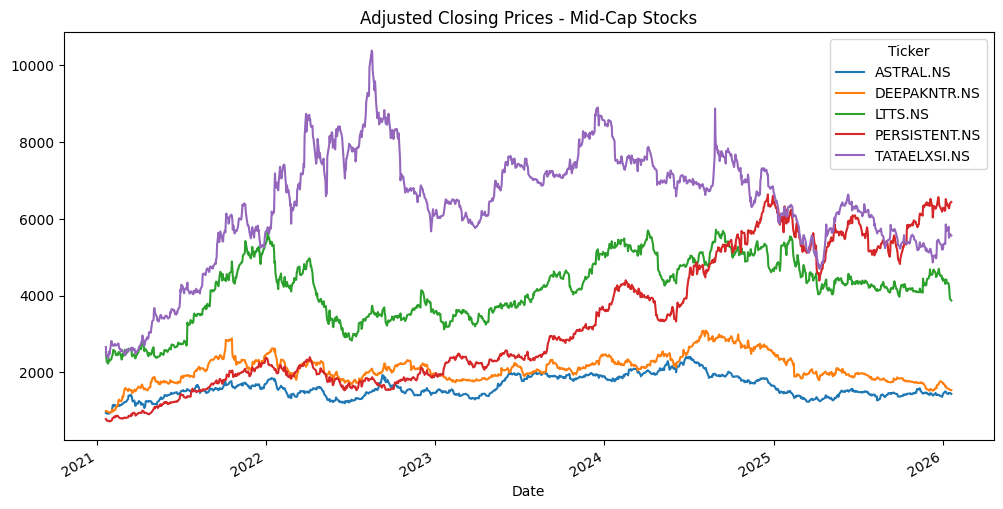

In [66]:
prices.drop(columns=['NIFTY50']).plot(figsize=(12,6))
plt.title('Adjusted Closing Prices - Mid-Cap Stocks')
plt.show()

## 2. Risk-Return Profile (Annualized, Log Returns)

In [67]:
prices = pd.read_csv("../data/raw_prices.csv", index_col=0, parse_dates=True)
prices.head()

,ASTRAL.NS,DEEPAKNTR.NS,LTTS.NS,PERSISTENT.NS,TATAELXSI.NS,NIFTY50
Date,,,,,,
2021-01-20,945.209229,992.164917,2519.987305,784.077515,2660.490967,14644.700195
2021-01-21,946.212341,995.949585,2392.470947,766.989563,2460.155029,14590.349609
2021-01-22,925.675903,984.005859,2277.232422,741.117737,2448.940186,14371.900391
2021-01-25,923.140198,969.457153,2226.652100,738.717651,2365.808838,14238.900391
2021-01-27,923.976074,950.091553,2343.360596,726.645630,2537.416504,13967.500000


In [68]:
log_returns = np.log(prices / prices.shift(1))
log_returns.dropna(inplace = True)
log_returns.head()

,ASTRAL.NS,DEEPAKNTR.NS,LTTS.NS,PERSISTENT.NS,TATAELXSI.NS,NIFTY50
Date,,,,,,
2021-01-21,0.001061,0.003807,-0.051927,-0.022035,-0.078286,-0.003718
2021-01-22,-0.021943,-0.012065,-0.049366,-0.034314,-0.004569,-0.015085
2021-01-25,-0.002743,-0.014896,-0.022462,-0.003244,-0.034535,-0.009297
2021-01-27,0.000905,-0.020178,0.051087,-0.016477,0.070026,-0.019244
2021-01-28,0.021038,0.006703,-0.020684,-0.009691,-0.025814,-0.010794


In [69]:
stock_returns = log_returns.drop(columns=['NIFTY50'])
market_returns = log_returns['NIFTY50']

In [70]:
annual_returns = stock_returns.mean() * 252
annual_returns

ASTRAL.NS        0.085831
DEEPAKNTR.NS     0.089198
LTTS.NS          0.087608
PERSISTENT.NS    0.429965
TATAELXSI.NS     0.150634
dtype: float64

In [71]:
annual_volatility = stock_returns.std() * np.sqrt(252)
annual_volatility

ASTRAL.NS        0.308881
DEEPAKNTR.NS     0.340251
LTTS.NS          0.329223
PERSISTENT.NS    0.346135
TATAELXSI.NS     0.338856
dtype: float64

In [72]:
risk_return_summary = pd.DataFrame({'Annual Return': annual_returns, 
                                    'Annual Volatility': annual_volatility})

risk_return_summary

,Annual Return,Annual Volatility
ASTRAL.NS,0.085831,0.308881
DEEPAKNTR.NS,0.089198,0.340251
LTTS.NS,0.087608,0.329223
PERSISTENT.NS,0.429965,0.346135
TATAELXSI.NS,0.150634,0.338856


- Persistent shows the highest annualized return but also higher volatility.
- Astral exhibits lower volatility with moderate returns, indicating defensive characteristics.


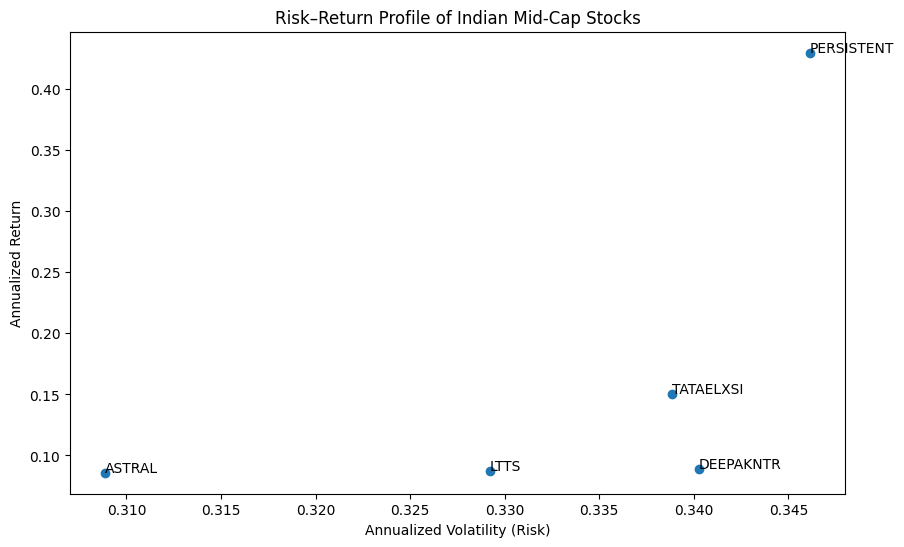

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(
    risk_return_summary["Annual Volatility"],
    risk_return_summary["Annual Return"]
)

for stock in risk_return_summary.index:
    plt.annotate(
        stock.replace(".NS", ""),
        (
            risk_return_summary.loc[stock, "Annual Volatility"],
            risk_return_summary.loc[stock, "Annual Return"]
        )
    )

plt.xlabel("Annualized Volatility (Risk)")
plt.ylabel("Annualized Return")
plt.title("Risk–Return Profile of Indian Mid-Cap Stocks")
plt.show()


In [74]:
import os

os.makedirs("../outputs/tables", exist_ok=True)


In [75]:
risk_return_summary.to_csv("../outputs/tables/risk_return_summary.csv")


## 3. CAPM & Cost of Equity

In [76]:
risk_free_rate = 0.065 

In [77]:
market_annual_return = market_returns.mean() * 252
market_annual_return

np.float64(0.11394061069220457)

In [78]:
betas = {}

for stock in stock_returns.columns:
    covariance = np.cov(stock_returns[stock], market_returns)[0,1]
    market_variance = np.var(market_returns)
    betas[stock] = covariance / market_variance

betas = pd.Series(betas)
betas

ASTRAL.NS        0.879629
DEEPAKNTR.NS     1.117721
LTTS.NS          1.074013
PERSISTENT.NS    1.098190
TATAELXSI.NS     0.836769
dtype: float64

In [79]:
cost_of_equity = risk_free_rate + betas * (market_annual_return - risk_free_rate)
cost_of_equity

ASTRAL.NS        0.108050
DEEPAKNTR.NS     0.119702
LTTS.NS          0.117563
PERSISTENT.NS    0.118746
TATAELXSI.NS     0.105952
dtype: float64

In [80]:
capm_summary = pd.DataFrame({'Beta': betas, 'Cost of Equity': cost_of_equity})
capm_summary

,Beta,Cost of Equity
ASTRAL.NS,0.879629,0.108050
DEEPAKNTR.NS,1.117721,0.119702
LTTS.NS,1.074013,0.117563
PERSISTENT.NS,1.098190,0.118746
TATAELXSI.NS,0.836769,0.105952


#### CAPM Assumptions
- Markets are efficient and investors are risk-averse.
- Beta captures only systematic (market) risk.
- Beta was estimated using historical covariance with the Nifty 50 to measure systematic risk exposure.

In [81]:
import os
os.makedirs("../outputs/tables", exist_ok=True)

capm_summary.to_csv("../outputs/tables/capm_summary.csv")


## 4. Relative Valuation using Gordon Growth (DCF Proxy)

##### This model uses a Gordon Growth-based valuation proxy where price is used as a normalized cash flow. The objective is not absolute valuation, but relative mispricing comparison across stocks using a consistent discount rate derived from CAPM.

In [82]:
latest_prices = prices.iloc[-1][stock_returns.columns]
latest_prices

ASTRAL.NS        1439.000000
DEEPAKNTR.NS     1535.599976
LTTS.NS          3870.000000
PERSISTENT.NS    6438.000000
TATAELXSI.NS     5563.000000
Name: 2026-01-19 00:00:00, dtype: float64

In [83]:
growth_rate = 0.05 
dcf_values = {}

for stock in stock_returns.columns:
    r = cost_of_equity[stock]
    g = growth_rate

    if r > g:
        intrinsic_value = latest_prices[stock] * (1+g) / (r-g)
        dcf_values[stock] = intrinsic_value
    else:
        dcf_values[stock] = np.nan

In [84]:
# This DCF model is designed as a comparative valuation framework using simpliefied assumption.
# The Intrinsic value (GG Model) are used directionally to identify relative undervaluation rather than absolute price targets.

In [85]:
dcf_summary = pd.DataFrame({
    "Market Price": latest_prices,
    "Intrinsic Value (DCF)": pd.Series(dcf_values)})

dcf_summary["Valuation Gap (%)"] = (
    (dcf_summary["Intrinsic Value (DCF)"] - dcf_summary["Market Price"])
    / dcf_summary["Market Price"]) * 100

dcf_summary


,Market Price,Intrinsic Value (DCF),Valuation Gap (%)
ASTRAL.NS,1439.000000,26028.612829,1708.798668
DEEPAKNTR.NS,1535.599976,23132.503045,1406.414653
LTTS.NS,3870.000000,60144.004608,1454.108646
PERSISTENT.NS,6438.000000,98331.420697,1427.359750
TATAELXSI.NS,5563.000000,104395.761874,1776.609058


In [86]:
import os
os.makedirs("../outputs/tables", exist_ok=True)

dcf_summary.to_csv("../outputs/tables/dcf_valuation_summary.csv")


## 5. Portfolio Optimization (Efficient Frontier)

In [87]:
cov_matrix = stock_returns.cov() * 252
cov_matrix

,ASTRAL.NS,DEEPAKNTR.NS,LTTS.NS,PERSISTENT.NS,TATAELXSI.NS
ASTRAL.NS,0.095408,0.032060,0.027816,0.027306,0.024764
DEEPAKNTR.NS,0.032060,0.115770,0.034512,0.033349,0.033319
LTTS.NS,0.027816,0.034512,0.108388,0.056034,0.031408
PERSISTENT.NS,0.027306,0.033349,0.056034,0.119810,0.034683
TATAELXSI.NS,0.024764,0.033319,0.031408,0.034683,0.114824


In [88]:
num_portfolios = 10000
portfolio_returns = []
portfolio_volatility = []
portfolio_weights = []

for _ in range(num_portfolios):
    weights = np.random.random(len(stock_returns.columns))
    weights /= np.sum(weights)

    ret = np.dot(weights, annual_returns)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    portfolio_returns.append(ret)
    portfolio_volatility.append(vol)
    portfolio_weights.append(weights)

In [89]:
portfolio_returns = np.array(portfolio_returns)
portfolio_volatility = np.array(portfolio_volatility)

sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_volatility

In [90]:
max_sharpe_idx = sharpe_ratios.argmax()
max_sharpe_weights = portfolio_weights[max_sharpe_idx]

In [91]:
min_vol_idx = portfolio_volatility.argmin()
min_vol_weights = portfolio_weights[min_vol_idx]

In [92]:
portfolio_allocation = pd.DataFrame({'Max Sharpe Portfolio': max_sharpe_weights, 
                                     'Min Volatility Portfolio': min_vol_weights}, index=stock_returns.columns)

portfolio_allocation

,Max Sharpe Portfolio,Min Volatility Portfolio
ASTRAL.NS,0.103497,0.307019
DEEPAKNTR.NS,0.075356,0.175027
LTTS.NS,0.073918,0.165789
PERSISTENT.NS,0.702619,0.149793
TATAELXSI.NS,0.044610,0.202372


##### The Max Sharpe portfolio exhibits concentration due to superior historical risk-adjusted returns of Persistent. In practice, allocation constraints may be applied to control concentration risk.

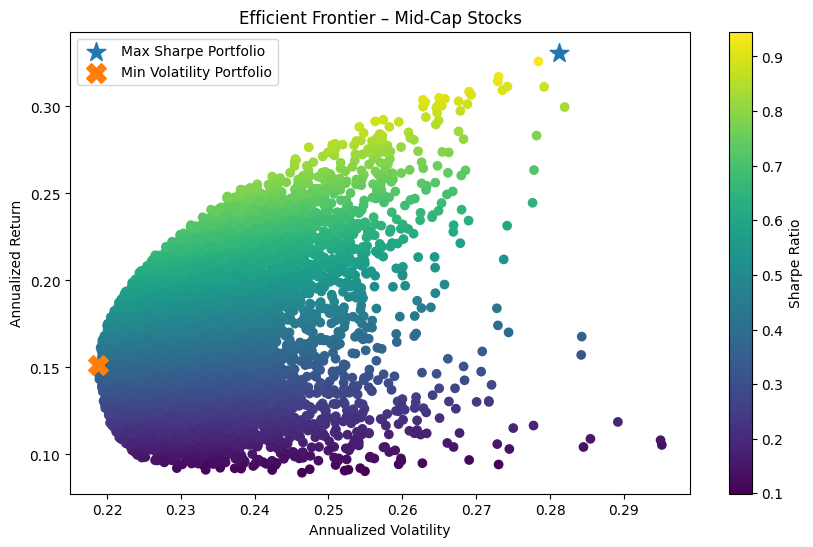

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(portfolio_volatility, portfolio_returns, c=sharpe_ratios, cmap="viridis")
plt.colorbar(label="Sharpe Ratio")

plt.scatter(
    portfolio_volatility[max_sharpe_idx],
    portfolio_returns[max_sharpe_idx],
    marker="*",
    s=200,
    label="Max Sharpe Portfolio"
)

plt.scatter(
    portfolio_volatility[min_vol_idx],
    portfolio_returns[min_vol_idx],
    marker="X",
    s=200,
    label="Min Volatility Portfolio"
)

plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.title("Efficient Frontier – Mid-Cap Stocks")
plt.legend()
plt.show()


In [94]:
os.makedirs("../outputs/tables", exist_ok=True)

portfolio_allocation.to_csv("../outputs/tables/optimal_portfolio_weights.csv")


## 6. Performance evaluation (Sharpe ratio)

In [95]:
max_sharpe_weights = np.array(max_sharpe_weights)
portfolio_returns_daily = stock_returns.dot(max_sharpe_weights)

In [96]:
portfolio_annual_return = portfolio_returns_daily.mean() * 252
portfolio_annual_volatility = portfolio_returns_daily.std() * np.sqrt(252)

portfolio_annual_return, portfolio_annual_volatility

(np.float64(0.3309022138457666), np.float64(0.2812725023257714))

In [97]:
portfolio_sharpe = (portfolio_annual_return - risk_free_rate) / portfolio_annual_volatility

portfolio_sharpe


np.float64(0.9453544574997139)

In [98]:
benchmark_annual_return = market_returns.mean() * 252
benchmark_annual_volatility = market_returns.std() * np.sqrt(252)

benchmark_sharpe = (benchmark_annual_return - risk_free_rate) / benchmark_annual_volatility

benchmark_sharpe

np.float64(0.35056788610571055)

In [99]:
performance_comparison = pd.DataFrame({
    "Optimized Portfolio": [
        portfolio_annual_return,
        portfolio_annual_volatility,
        portfolio_sharpe
    ],
    "NIFTY 50": [
        benchmark_annual_return,
        benchmark_annual_volatility,
        benchmark_sharpe
    ]
},
index=["Annual Return", "Annual Volatility", "Sharpe Ratio"])

performance_comparison


,Optimized Portfolio,NIFTY 50
Annual Return,0.330902,0.113941
Annual Volatility,0.281273,0.139604
Sharpe Ratio,0.945354,0.350568


##### Portfolio weights are static and evaluated over the same historical window as estimation; no rebalancing is assumed.

In [100]:
os.makedirs("../outputs/tables", exist_ok=True)
performance_comparison.to_csv("../outputs/tables/performance_comparison.csv")


## 7. MCDM / MAUT - Based stock ranking

In [101]:
mcdm_data = pd.DataFrame({'Return': annual_returns, 'Volatility': annual_volatility,
                          'Beta': betas, 'Valuation Gap (%)': dcf_summary['Valuation Gap (%)']})

mcdm_data

,Return,Volatility,Beta,Valuation Gap (%)
ASTRAL.NS,0.085831,0.308881,0.879629,1708.798668
DEEPAKNTR.NS,0.089198,0.340251,1.117721,1406.414653
LTTS.NS,0.087608,0.329223,1.074013,1454.108646
PERSISTENT.NS,0.429965,0.346135,1.098190,1427.359750
TATAELXSI.NS,0.150634,0.338856,0.836769,1776.609058


In [102]:
normalized_data = pd.DataFrame(index=mcdm_data.index)

for col in ["Return", "Valuation Gap (%)"]:
    normalized_data[col] = (
        mcdm_data[col] - mcdm_data[col].min()) / (mcdm_data[col].max() - mcdm_data[col].min())

for col in ["Volatility", "Beta"]:
    normalized_data[col] = (
        mcdm_data[col].max() - mcdm_data[col]) / (mcdm_data[col].max() - mcdm_data[col].min())

normalized_data


,Return,Valuation Gap (%),Volatility,Beta
ASTRAL.NS,0.000000,0.816825,1.000000,0.847447
DEEPAKNTR.NS,0.009785,0.000000,0.157962,0.000000
LTTS.NS,0.005165,0.128835,0.453981,0.155570
PERSISTENT.NS,1.000000,0.056579,0.000000,0.069516
TATAELXSI.NS,0.188307,1.000000,0.195386,1.000000


In [103]:
weights = {'Return': 0.35, 'Volatility': 0.25, 'Beta': 0.15, 'Valuation Gap (%)': 0.25}

 Weights reflect a balanced investor profile:

- Return (35%): Primary objective of equity investing
- Valuation Gap (25%): Captures fundamental mispricing
- Volatility (25%): Controls downside risk
- Beta (15%): Measures systematic risk exposure

Weights can be adjusted to reflect different investor preferences.

In [104]:
utility_score = sum(
    normalized_data[col] * weight
    for col, weight in weights.items()
)

mcdm_ranking = pd.DataFrame({
    "Utility Score": utility_score
}).sort_values(by="Utility Score", ascending=False)

mcdm_ranking


,Utility Score
ASTRAL.NS,0.581323
TATAELXSI.NS,0.514754
PERSISTENT.NS,0.374572
LTTS.NS,0.170847
DEEPAKNTR.NS,0.042915


In [105]:
mcdm_ranking['Rank'] = range(1, len(mcdm_ranking) + 1)
mcdm_ranking

,Utility Score,Rank
ASTRAL.NS,0.581323,1
TATAELXSI.NS,0.514754,2
PERSISTENT.NS,0.374572,3
LTTS.NS,0.170847,4
DEEPAKNTR.NS,0.042915,5


In [106]:
os.makedirs("../outputs/tables", exist_ok=True)
mcdm_ranking.to_csv("../outputs/tables/mcdm_stock_ranking.csv")


## 8. Final Investment Recommendation 

In [107]:
final_recommendation = pd.DataFrame({
    "Market Price": dcf_summary["Market Price"],
    "Intrinsic Value": dcf_summary["Intrinsic Value (DCF)"],
    "Valuation Gap (%)": dcf_summary["Valuation Gap (%)"],
    "MCDM Rank": mcdm_ranking["Rank"],
    "Optimized Weight": portfolio_allocation["Max Sharpe Portfolio"]})

def recommendation(row):
    if row["Valuation Gap (%)"] > 10 and row["MCDM Rank"] <= 2 and row["Optimized Weight"] > 0:
        return "BUY"
    elif row["Valuation Gap (%)"] < -10:
        return "AVOID"
    else:
        return "HOLD"

final_recommendation["Recommendation"] = final_recommendation.apply(recommendation, axis=1)
final_recommendation


,Market Price,Intrinsic Value,Valuation Gap (%),MCDM Rank,Optimized Weight,Recommendation
ASTRAL.NS,1439.000000,26028.612829,1708.798668,1,0.103497,BUY
DEEPAKNTR.NS,1535.599976,23132.503045,1406.414653,5,0.075356,HOLD
LTTS.NS,3870.000000,60144.004608,1454.108646,4,0.073918,HOLD
PERSISTENT.NS,6438.000000,98331.420697,1427.359750,3,0.702619,HOLD
TATAELXSI.NS,5563.000000,104395.761874,1776.609058,2,0.044610,BUY


##### Astral ranks highest based on combined valuation attractiveness, MAUT score and positive contribution to portfolio efficiency.
##### Persistent contributes significantly to portfolio efficiency due to its return and correlation characteristics.

##### Final recommendations are rule-based and combine valuation, ranking and portfolio efficiency.
##### Thresholds are chosen for interpretability and can be adjusted based on investor preference.

### Final Investment Recommendation 
- This framework integrates DCF-based relative valuation, efficient frontier portfolio optimization and MAUT-based multi-criteria ranking.
- The approach ensures that stock selection decisions are fundamentally grounded, risk-aware and aligned with portfolio-level efficiency.

In [108]:
import os
os.makedirs("../outputs/tables", exist_ok=True)
final_recommendation.to_csv("../outputs/tables/final_investment_recommendation.csv")
